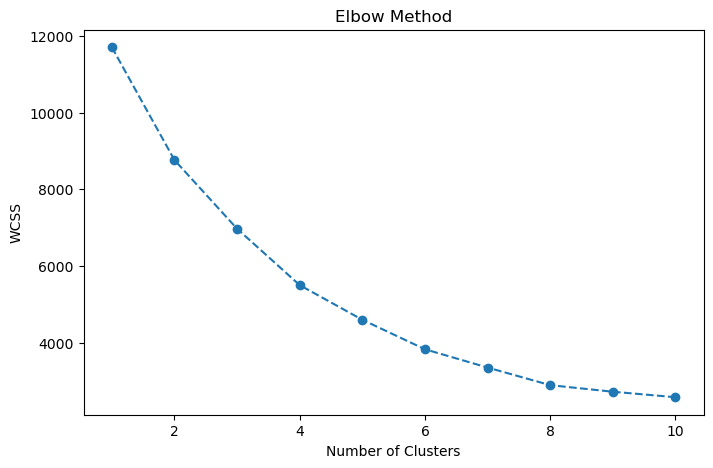

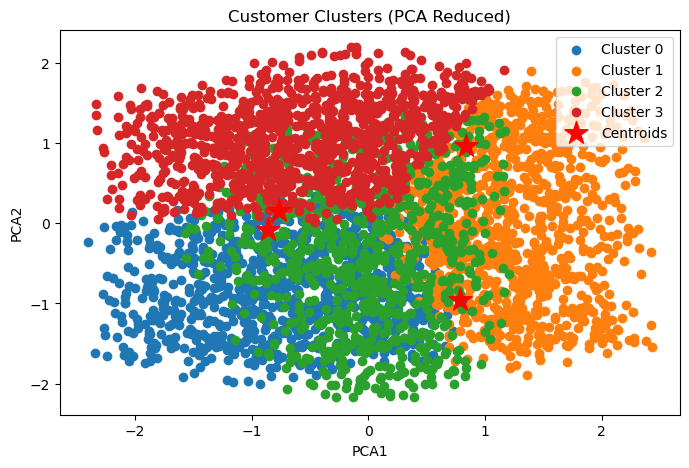

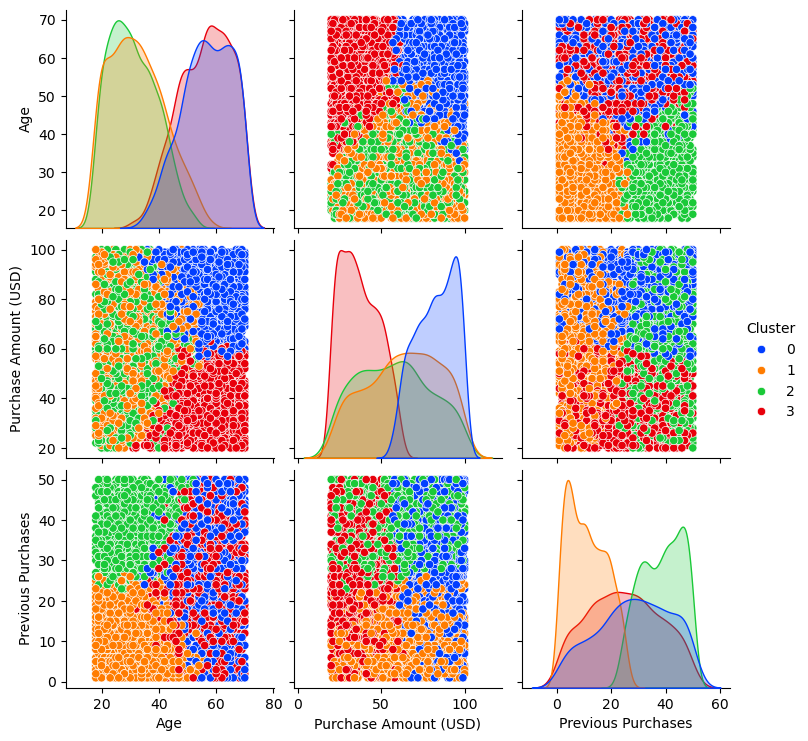

Clustered dataset saved as 'clustered_customers.csv'.


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler # type: ignore
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = 'E:\\mainflow assignment\\task3\\archive (1)\\shopping_trends_updated.csv'
data = pd.read_csv(data_path)

# Select relevant features for clustering
features = ['Age', 'Purchase Amount (USD)', 'Previous Purchases']
X = data[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Optimal number of clusters (from the Elbow Method, e.g., 4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
for cluster in range(optimal_clusters):
    plt.scatter(X_pca[data['Cluster'] == cluster, 0], 
                X_pca[data['Cluster'] == cluster, 1], 
                label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=300, c='red', marker='*', label='Centroids')
plt.title('Customer Clusters (PCA Reduced)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

# Pair plot to analyze clusters
sns.pairplot(data, vars=features, hue='Cluster', palette='bright')
plt.show()

# Save the clustered dataset
data.to_csv('E:\\mainflow assignment\\task3\\archive (1)\\shopping_trends.csv', index=False)
print("Clustered dataset saved as 'clustered_customers.csv'.")